In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [153]:
games = pd.read_csv('steam_games (original).csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27595 entries, 0 to 27594
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           27595 non-null  object 
 1   tags            27595 non-null  object 
 2   discount_price  27595 non-null  float64
 3   specs           27595 non-null  object 
 4   price           27595 non-null  float64
 5   early_access    27595 non-null  bool   
 6   id              27595 non-null  int64  
 7   sentiment       27595 non-null  object 
 8   metascore       27595 non-null  int64  
 9   release_year    27595 non-null  int64  
 10  genre           27595 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 2.1+ MB


In [154]:
steam = games[['title','specs','price','early_access','sentiment','metascore']]
steam

,title,specs,price,early_access,sentiment,metascore
0,Lost Summoner Kitty,[Single-player],4.99,False,no disponible,0
1,Ironbound,"[Single-player,Multi-player,OnlineMulti-Player...",0.00,False,Mostly Positive,0
2,Real Pool 3D - Poolians,"[Single-player,Multi-player,OnlineMulti-Player...",0.00,False,Mostly Positive,0
3,弹炸人2222,[Single-player],0.99,False,no disponible,0
4,Battle Royale Trainer,"[Single-player,SteamAchievements]",3.99,False,Mixed,0
...,...,...,...,...,...,...
27590,Kebab it Up!,"[Single-player,SteamAchievements,SteamCloud]",1.99,False,2 user reviews,0
27591,Colony On Mars,"[Single-player,SteamAchievements]",1.99,False,no disponible,0
27592,LOGistICAL: South Africa,"[Single-player,SteamAchievements,SteamCloud,St...",4.99,False,no disponible,0
27593,Russian Roads,"[Single-player,SteamAchievements,SteamTradingC...",1.99,False,no disponible,0


In [155]:
steam.describe()

,price,metascore
count,27595.000000,27595.000000
mean,9.002920,6.589527
std,15.958876,21.053410
min,0.000000,0.000000
25%,2.990000,0.000000
50%,4.990000,0.000000
75%,9.990000,0.000000
max,995.000000,96.000000


In [156]:
# transformar etiquetas categóricas a valores numéricos
le = preprocessing.LabelEncoder()
steam['title2'] = le.fit_transform(steam['title'].copy())    
steam['specs2'] = le.fit_transform(steam['specs'].copy())  
steam['sentiment2'] = le.fit_transform(steam['sentiment'].copy()) 

C:\Users\leidy\AppData\Local\Temp\ipykernel_6988\1048937486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steam['title2'] = le.fit_transform(steam['title'].copy())
C:\Users\leidy\AppData\Local\Temp\ipykernel_6988\1048937486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steam['specs2'] = le.fit_transform(steam['specs'].copy())
C:\Users\leidy\AppData\Local\Temp\ipykernel_6988\1048937486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [157]:
# Transformar a valores numéricos
steam['early_access2'] = steam['early_access'].astype(int)

C:\Users\leidy\AppData\Local\Temp\ipykernel_6988\3943265992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steam['early_access2'] = steam['early_access'].astype(int)


In [158]:
steam = steam.drop(['title', 'early_access','sentiment','specs'], axis=1)

In [121]:
steam

,price,metascore,title2,specs2,sentiment2,early_access2
0,4.99,0,13193,3556,18,0
1,0.00,0,11899,2272,11,0
2,0.00,0,17685,2316,11,0
3,0.99,0,27558,3556,18,0
4,3.99,0,2181,3503,9,0
...,...,...,...,...,...,...
27590,1.99,0,12261,3388,1,0
27591,1.99,0,4286,3503,18,0
27592,4.99,0,12634,3384,18,0
27593,1.99,0,19736,3483,18,0


In [159]:
steam.corr()

,price,metascore,title2,specs2,sentiment2,early_access2
price,1.000000,0.115036,0.010822,-0.018336,0.018319,0.015169
metascore,0.115036,1.000000,-0.007544,0.138301,0.136751,-0.070752
title2,0.010822,-0.007544,1.000000,0.045872,-0.016905,-0.006547
specs2,-0.018336,0.138301,0.045872,1.000000,-0.039892,0.048113
sentiment2,0.018319,0.136751,-0.016905,-0.039892,1.000000,-0.040673
early_access2,0.015169,-0.070752,-0.006547,0.048113,-0.040673,1.000000


In [11]:
# Heatmap matriz de correlaciones
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    #corr = games.drop(columns = ['price']).corr(method='pearson')
    plt.figure(figsize=(12,8))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 12},
                # xticklabels= games.drop(columns = ['price']).columns, 
                # yticklabels= games.drop(columns =  ['price']).columns,
                 cmap= 'coolwarm')
    plt.xticks(rotation = 20)
    plt.yticks(rotation = 20)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.0 # Add 0.5 to the bottom
    t -= 0.0 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

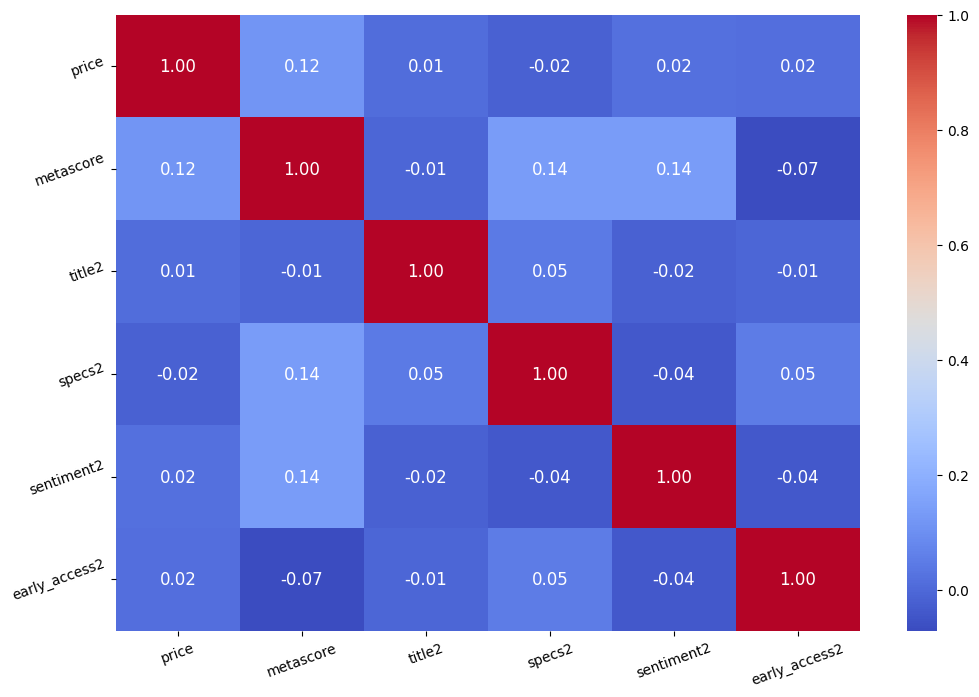

In [21]:
corr = steam.corr()
plot_corre_heatmap(corr)

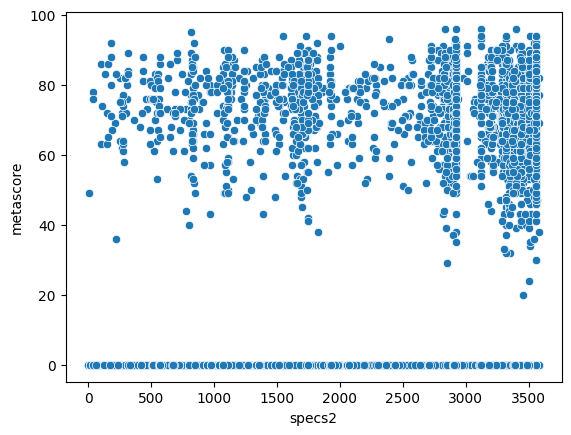

In [34]:
sns.scatterplot(x=steam['specs2'], y=steam['metascore'] )
plt.show()

     Regresion Lineal Multiple

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Separar los datos en atributos (X) y target (y)
X = steam[['metascore', 'specs2']]
y = steam['price']

In [161]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(20696, 2) (20696,) (6899, 2) (6899,)


In [162]:
# Crear el modelo de regresión lineal
linear_model = LinearRegression()

# Entrenar el modelo 
linear_model.fit(X_train, y_train)

# Se Predise las etiquetas de salida Y :en el subset de entrenamiento y en el subset de testeo
# para cada una de las instancias
y_train_pred = linear_model.predict(X_train) # subset de entrenamiento
y_test_pred = linear_model.predict(X_test) #subset de testeo

# Obtener los componentes del regresor. Tenemos dos pendientes
print('Las pendientes del modelo de regresión lineal son:', linear_model.coef_)
print('La ordenada al origen del modelo de regresión lineal es:', linear_model.intercept_)

Las pendientes del modelo de regresión lineal son: [ 0.09386628 -0.00053726]
La ordenada al origen del modelo de regresión lineal es: 9.59391425176906


In [163]:
# Realizar predicciones en el conjunto de prueba
y_train_pred = linear_model.predict(X_train) # subset de entrenamiento
y_test_pred = linear_model.predict(X_test) #subset de testeo

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 16.252214136534466
Raíz del error cuadrático medio en Test: 14.548083843534428


In [101]:
# Calcular el RMSE del modelo
#rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
#print("RMSE del modelo:", rmse)

RMSE del modelo: 14.548083728028557


     Como podemos observar el RMSE indica que la prediccio del modelo no son precisas en comparación con los valores reales en los datos de prueba

In [164]:
 # Si el r2 es muy cercano a uno indica que el modelo predice con exactitud
from sklearn.metrics import r2_score 

r2 = r2_score(y_test, y_test_pred) 
print('El coeficiente de determinación del regresor es:', r2)

El coeficiente de determinación del regresor es: 0.012613287545257701


     Regresion Lineal con Atributos Polinomicos 

In [165]:
from sklearn.preprocessing import PolynomialFeatures
# Separar las características y el objetivo:
X = steam[['specs2', 'metascore']]
y = steam['price']

# Dividir los datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Aplicar transformación polinómica a las características:
degree = 6  # Grado del polinomio (puedes ajustar este valor)
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Crear y entrenar el modelo de regresión lineal:
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [166]:
# Realizar predicciones y calcular el RMSE:
y_pred = model.predict(X_test_poly)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE del modelo:", rmse)


RMSE del modelo: 13.929205127679117


In [167]:
r2 = r2_score(y_test, y_pred) 
print('El coeficiente de determinación del regresor es:', r2)

El coeficiente de determinación del regresor es: 0.034289762930199696


In [20]:
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error


In [21]:
# Dividir los datos en conjuntos de entrenamiento y prueba:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [22]:
# # Crear y entrenar el modelo XGBoost:
# model = xgb.XGBRegressor()
# model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [23]:
# Realizar predicciones 
#y_pred = model.predict(X_test)


In [24]:
# # Calcular el RMSE del modelo
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print("RMSE del modelo:", rmse)


RMSE del modelo: 14.189173097867569


In [25]:
# r2 = r2_score(y_test, y_pred) 
# print('El coeficiente de determinación del regresor es:', r2)

El coeficiente de determinación del regresor es: 0.0607312756075834
